In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/OnlineRetail.csv", encoding="ISO-8859-1")
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Summary
We begin by exploring dataset structure and basic descriptive statistics.

---

In [21]:
# Summary stats
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


## Frequency Counts
We check the most frequent countries and products.

---

In [22]:
# Top 10 countries by number of transactions
print(df['Country'].value_counts().head(10))

print("")

# Top 10 products by frequency
print(df['Description'].value_counts().head(10))

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64


## Univariate Visualizations
We analyze distributions of Quantity, Unit Price, and most active Countries/Products.

---

**>>> Quantity Distribution**

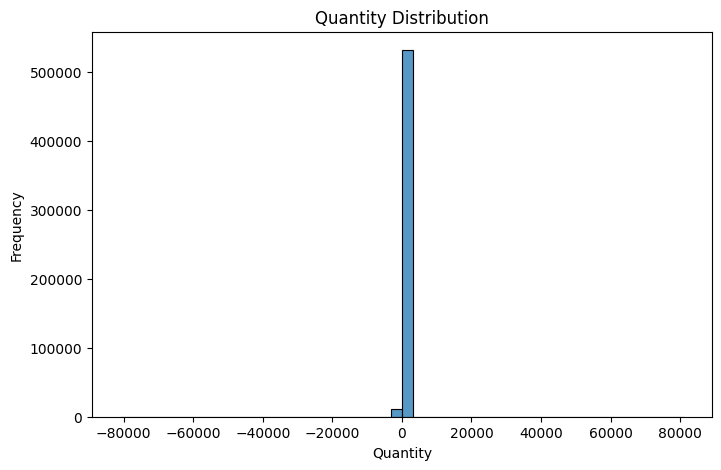

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50, kde=False)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.savefig("../assets/plots/quantity_distribution.png")
plt.show()

**>>> Unit Price Distribution**

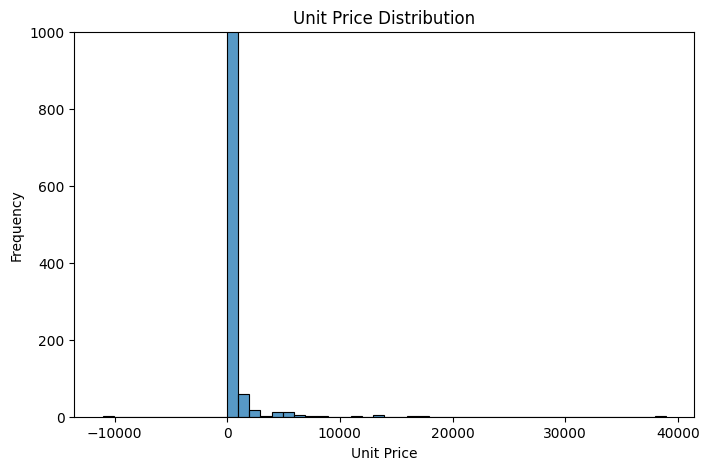

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df['UnitPrice'], bins=50, kde=False)
plt.title("Unit Price Distribution")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.ylim(0, 1000)   # avoid skew from extreme values
plt.savefig("../assets/plots/unitprice_distribution.png")
plt.show()

**>>> Top 10 Countries**

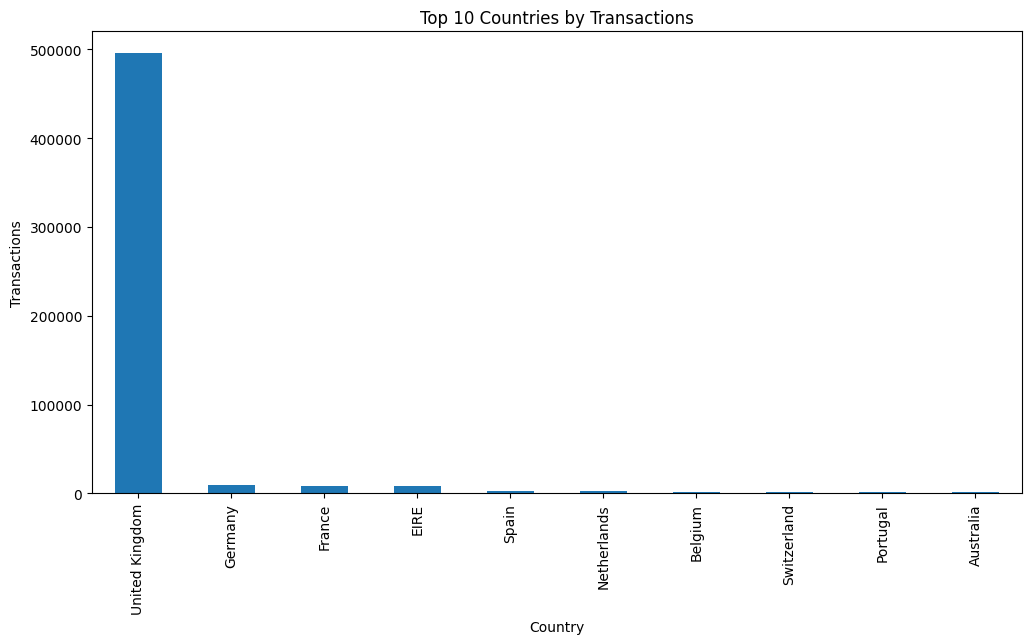

In [25]:
plt.figure(figsize=(12,6))
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries by Transactions")
plt.xlabel("Country")
plt.ylabel("Transactions")
plt.savefig("../assets/plots/top10_countries.png")
plt.show()

**>>> Top 10 Products**

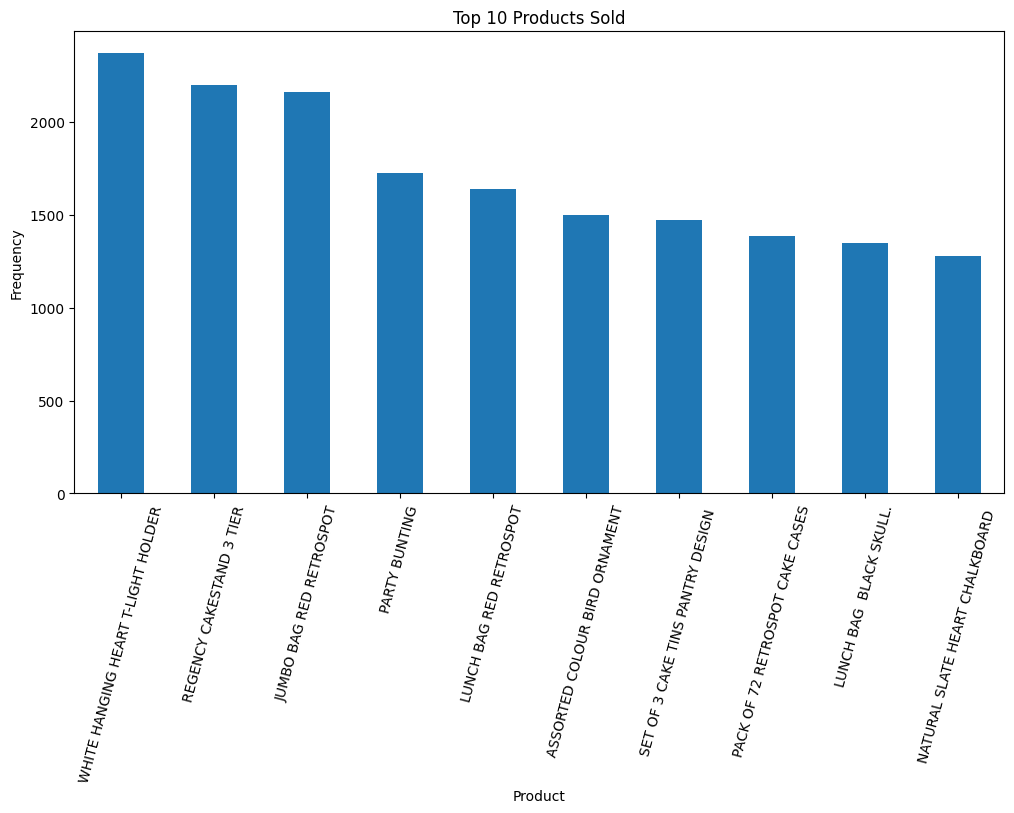

In [26]:
plt.figure(figsize=(12,6))
df['Description'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Products Sold")
plt.xlabel("Product")
plt.ylabel("Frequency")
plt.xticks(rotation=75)
plt.savefig("../assets/plots/top10_products.png")
plt.show()

## Extract Date Features
We create new features from `InvoiceDate` such as Year, Month, Day, and Weekday.

---

In [27]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df[['InvoiceDate','Year','Month','Day','Weekday']].head()

,InvoiceDate,Year,Month,Day,Weekday
0,2010-12-01 08:26:00,2010,12,1,Wednesday
1,2010-12-01 08:26:00,2010,12,1,Wednesday
2,2010-12-01 08:26:00,2010,12,1,Wednesday
3,2010-12-01 08:26:00,2010,12,1,Wednesday
4,2010-12-01 08:26:00,2010,12,1,Wednesday


## Monthly Transactions
We analyze number of transactions per month over time.

---

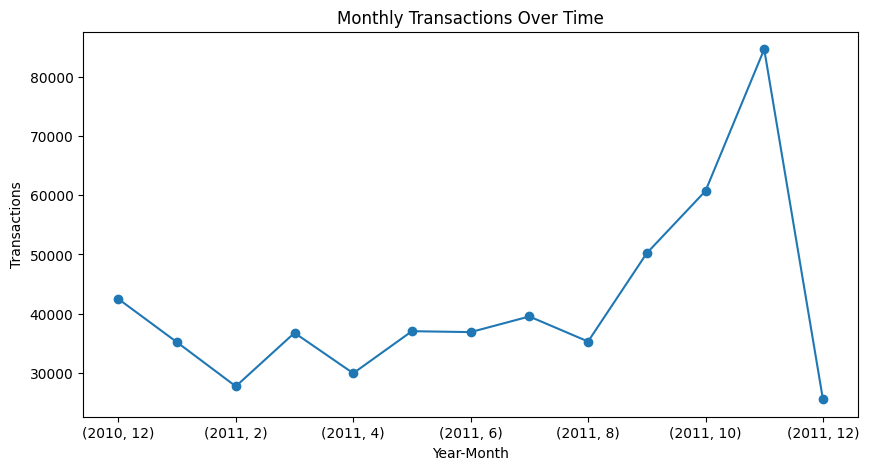

In [29]:
monthly_sales = df.groupby(['Year','Month']).size()
monthly_sales.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Monthly Transactions Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Transactions")
plt.savefig("../assets/plots/monthly_transactions.png")
plt.show()

## Weekday Transactions
We analyze on which weekdays transactions occur most frequently.

---

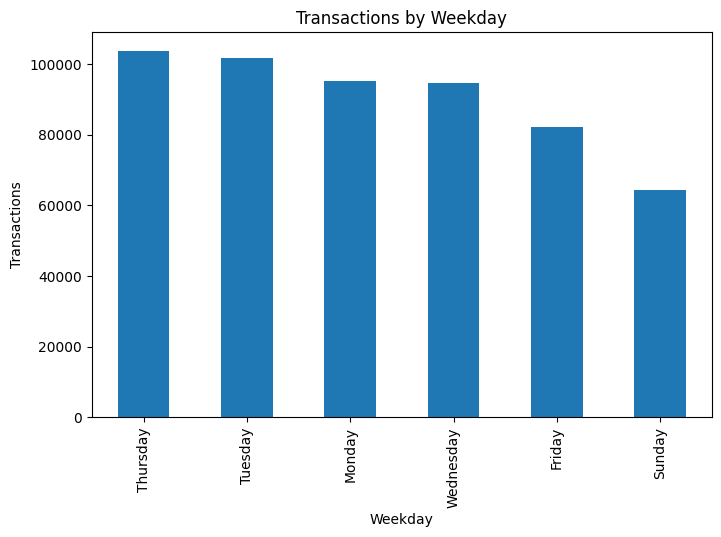

In [30]:
weekday_sales = df['Weekday'].value_counts()
weekday_sales.plot(kind='bar', figsize=(8,5))
plt.title("Transactions by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Transactions")
plt.savefig("../assets/plots/weekday_transactions.png")
plt.show()